# 写真に映る動物が犬か猫かを分類

In [6]:
import tensorflow as tf

# データセットの読み込み
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/train",
    image_size=(96, 96),
    label_mode="binary",
    batch_size=32,
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dog_cat_photos/test",
    image_size=(96, 96),
    label_mode="binary",
    batch_size=32,
    shuffle=False
)

Found 300 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [7]:
# 画像の水増し用関数
def flip_left_right(image, label):
    image = tf.image.random_flip_left_right(image)
    return image, label

def flip_up_down(image, label):
    image = tf.image.random_flip_up_down(image)
    return image, label

def rot90(image, label):
    image = tf.image.rot90(image)
    return image, label

def rot180(image, label):
    image = tf.image.rot90(image, k=2)
    return image, label

def rot270(image, label):
    image = tf.image.rot90(image, k=3)
    return image, label

# 水増しの実行
train_dataset_lr = train_dataset.map(flip_left_right)
train_dataset_ud = train_dataset.map(flip_up_down)
train_dataset_r90 = train_dataset.map(rot90)
train_dataset_r180 = train_dataset.map(rot180)
train_dataset_r270 = train_dataset.map(rot270)

# 水増しデータセットの結合
train_dataset = (
    train_dataset
    .concatenate(train_dataset_lr)
    .concatenate(train_dataset_ud)
    .concatenate(train_dataset_r90)
    .concatenate(train_dataset_r180)
    .concatenate(train_dataset_r270)
)

# シャッフル
train_dataset = train_dataset.shuffle(32)

In [19]:
# モデルの作成
ipnut_layer = tf.keras.layers.Input(shape=(96, 96, 3))
l_layer = tf.keras.applications.mobilenet_v2.preprocess_input(ipnut_layer)

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(96, 96, 3),
    input_tensor=l_layer,
    include_top=False,
    weights="mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_96_no_top.h5",
    pooling='avg'
)
base_model.trainable = False

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

model = tf.keras.models.Sequential([
    base_model,
    output_layer
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# モデルの学習
model.fit(train_dataset, epochs=20)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8017 - loss: 0.4222
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9311 - loss: 0.1913
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9500 - loss: 0.1351
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9617 - loss: 0.1105
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9728 - loss: 0.0877
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9783 - loss: 0.0770
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9833 - loss: 0.0643
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9883 - loss: 0.0565
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9894 - loss: 0.0504
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9933 - loss: 0.0418
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9961 - loss: 0.0373
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy:

In [10]:
# テストデータで分類
pred_data = model.predict(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


In [11]:
# モデルの評価
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9800 - loss: 0.0480


[0.047971561551094055, 0.9800000190734863]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


2025-08-12 10:58:50.219224: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-08-12 10:58:50.226878: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


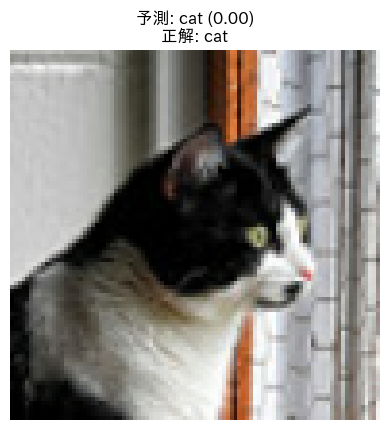

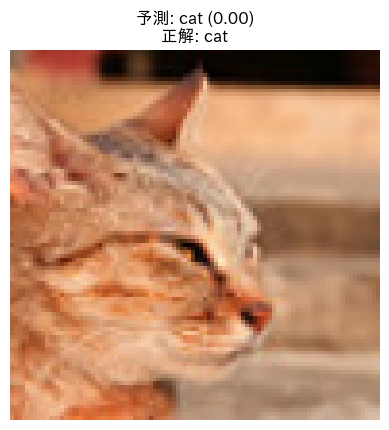

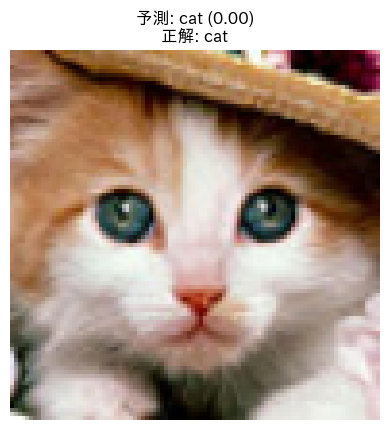

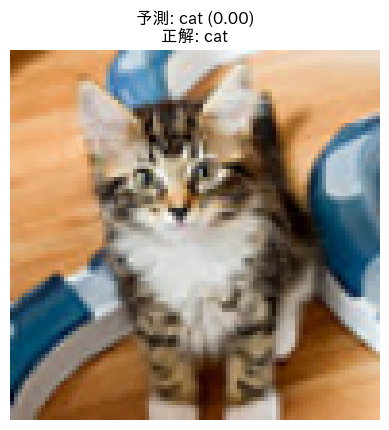

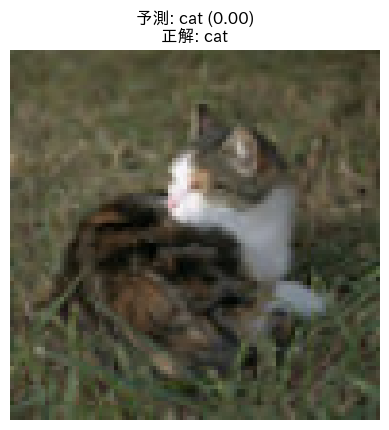

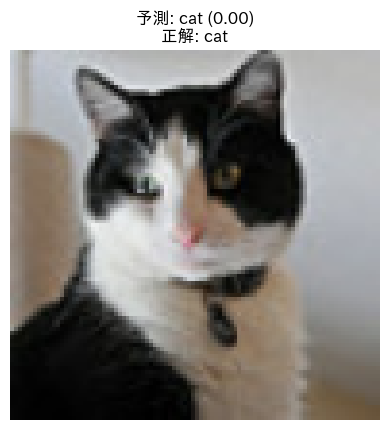

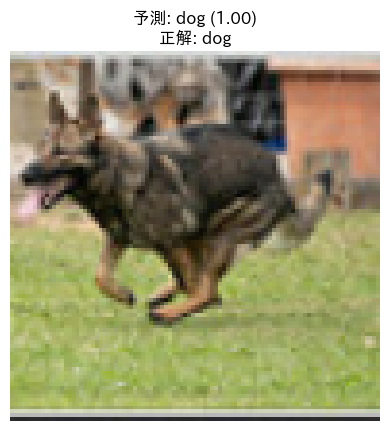

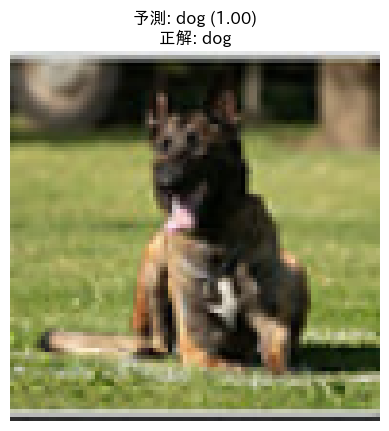

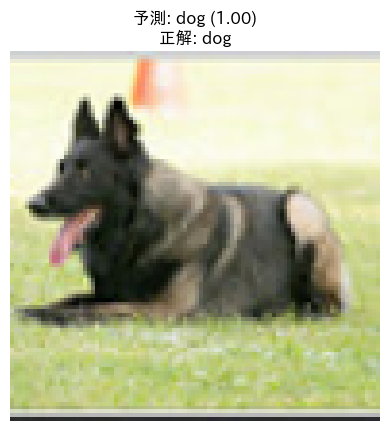

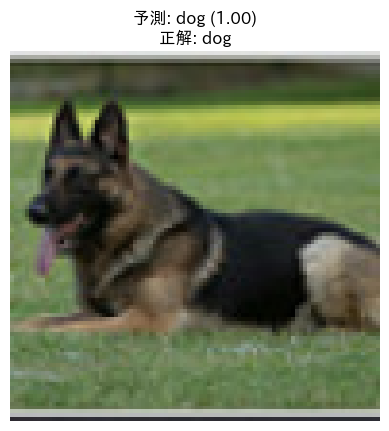

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 予測値を取得（0〜1の確率）
preds = model.predict(test_dataset)
# ラベルを取得
labels = np.concatenate([y for x, y in test_dataset], axis=0)

# 画像を取得
images = np.concatenate([x.numpy() for x, y in test_dataset], axis=0)

# ランダムに10個のインデックスを抽出（重複なし）
random_indices = np.random.choice(len(images), size=10, replace=False)

# 最初の10件を確認
for i in random_indices:
    plt.imshow(images[i].astype("uint8"))
    plt.title(f"予測: {'dog' if preds[i] > 0.5 else 'cat'} ({preds[i][0]:.2f})\n正解: {'dog' if labels[i]==1 else 'cat'}")
    plt.axis('off')
    plt.show()

選択された画像のラベル: 猫
最後の畳み込み層の名前: Conv_1
畳み込み層 'Conv_1' が見つかりました


/Users/hkitta/ai_training/pythondev/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=['Tensor(shape=(1, 96, 96, 3))']
  warnings.warn(msg)


勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>


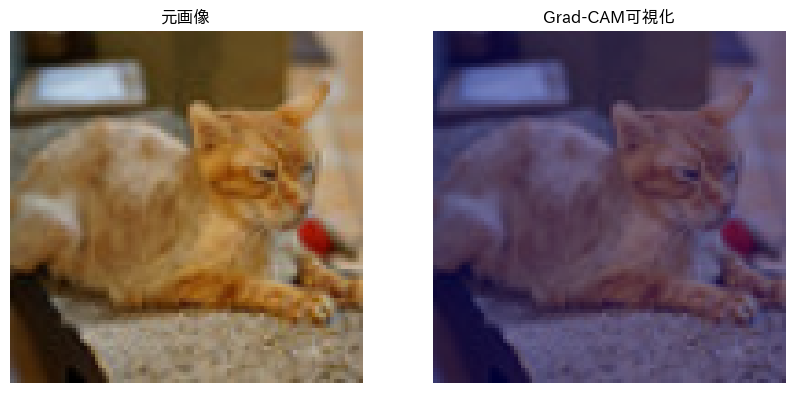

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib

def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # MobileNetV2モデルを取得
    base_model = model.layers[0]
    
    # 指定された畳み込み層を取得
    try:
        last_conv_layer = base_model.get_layer(last_conv_layer_name)
        print(f"畳み込み層 '{last_conv_layer_name}' が見つかりました")
    except ValueError:
        print(f"レイヤー '{last_conv_layer_name}' が見つかりません。レイヤー一覧:")
        for layer in base_model.layers:
            print(f" - {layer.name} ({type(layer).__name__})")
        raise
    
    # 勾配計算のための新しいモデルを作成
    grad_model = tf.keras.models.Model(
        inputs=[base_model.inputs],
        outputs=[
            base_model.get_layer(last_conv_layer_name).output,
            base_model.output
        ]
    )
    
    # 勾配テープを使用して計算
    with tf.GradientTape() as tape:
        # 畳み込み出力と予測を取得
        conv_output, predictions = grad_model(img_array)
        
        # 元のモデルの出力層を取得
        dense_layer = model.layers[-1]
        
        # 元のモデルと同じ処理を適用
        predictions = dense_layer(predictions)
        
        # 対象クラス（この場合は最初のクラス）
        class_channel = predictions[:, 0]
    
    # 勾配を計算
    grads = tape.gradient(class_channel, conv_output)
    
    # デバッグ情報
    print(f"勾配の型: {type(grads)}")
    if grads is None:
        print("警告: 勾配がNoneです。計算グラフの接続に問題があります。")
        # 代替アプローチを試みる
        print("代替アプローチを試行中...")
        
        # 入力を直接監視
        with tf.GradientTape() as tape:
            tape.watch(img_array)
            # モデル全体を通して予測
            preds = model(img_array)
            class_channel = preds[:, 0]
        
        # 入力に対する勾配を計算
        input_grads = tape.gradient(class_channel, img_array)
        print(f"入力勾配の形状: {input_grads.shape if input_grads is not None else None}")
        
        # 代替の可視化方法（入力勾配の絶対値の平均）
        if input_grads is not None:
            heatmap = tf.reduce_mean(tf.abs(input_grads), axis=-1)[0]
            heatmap = heatmap / tf.reduce_max(heatmap)
            return heatmap.numpy()
        else:
            # ダミーのヒートマップを返す
            print("警告: 代替アプローチも失敗しました。ダミーのヒートマップを返します。")
            return np.ones((8, 8))  # ダミーのヒートマップ
    
    # 勾配をプール
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # 特徴マップに勾配の重要度を掛ける
    conv_output = conv_output[0]
    heatmap = conv_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    # ヒートマップを正規化
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()



def display_gradcam(img, heatmap, alpha=0.4, cmap=cv2.COLORMAP_JET):
    # 画像サイズにヒートマップをリサイズ
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cmap)
    
    # RGB変換（OpenCVはBGR形式）
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    
    # 元画像とヒートマップを重ね合わせ
    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("元画像")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title("Grad-CAM可視化")
    plt.axis('off')
    plt.show()

import random

# テストデータから1バッチ取り出し、その中からランダムに1枚選ぶ
for images, labels in test_dataset.take(1):
    # バッチサイズを取得
    batch_size = images.shape[0]
    # ランダムなインデックスを生成
    random_idx = random.randint(0, batch_size - 1)
    
    # ランダムな画像とラベルを取得
    image = images[random_idx].numpy().astype("uint8")
    label = labels[random_idx].numpy()
    img_array = tf.expand_dims(images[random_idx], axis=0)
    
    # 情報表示
    print(f"選択された画像のラベル: {'猫' if label < 0.5 else '犬'}")
    break

# MobileNetV2の最後の畳み込み層の名前を確認
# 通常は "Conv_1" だが、念のため確認
conv_layer_name = None
for layer in model.layers[0].layers:  # model.layers[0]がMobileNetV2
    if isinstance(layer, tf.keras.layers.Conv2D):
        conv_layer_name = layer.name
        
print(f"最後の畳み込み層の名前: {conv_layer_name}")

# 最後の畳み込み層が見つからない場合のフォールバック
if not conv_layer_name:
    conv_layer_name = "Conv_1"  # MobileNetV2の最後の畳み込み層の一般的な名前

# Grad-CAM適用
heatmap = make_gradcam_heatmap(img_array, model, conv_layer_name)

# 結果を表示
display_gradcam(image, heatmap)


畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_6_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_12_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_16_project' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'Conv_1' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>


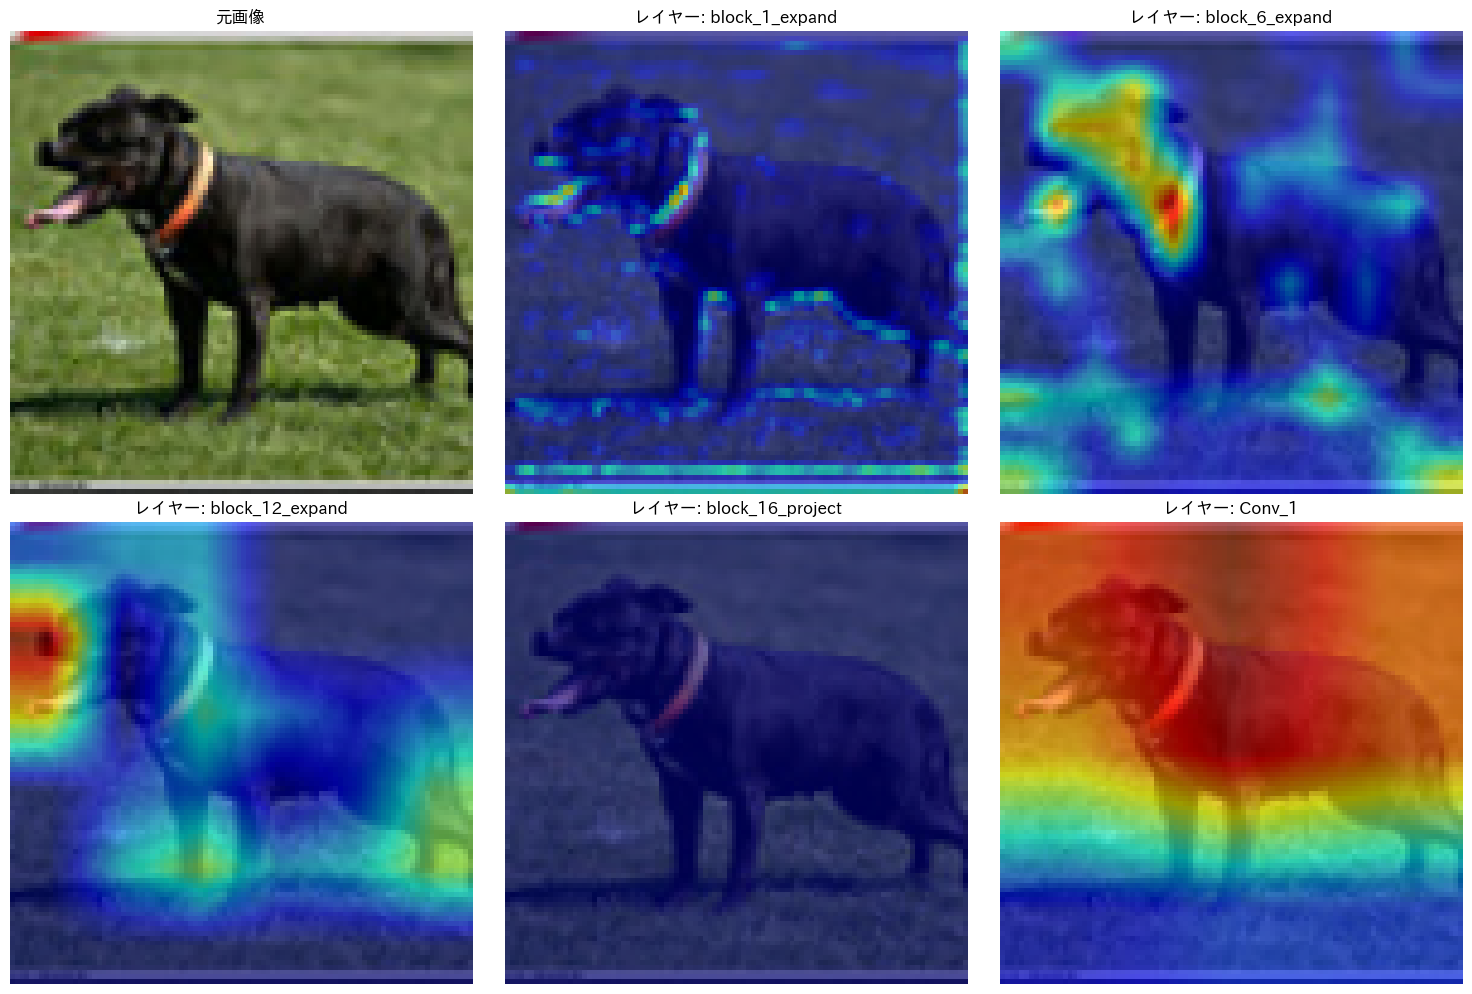

In [14]:
# MobileNetV2の様々な層でGrad-CAMを試す
layer_names = [
    "block_1_expand", # 浅い層
    "block_6_expand", # 中間層
    "block_12_expand", # 深い層
    "block_16_project", # より深い層
    "Conv_1" # 最も深い層
]

# ランダムな画像を取得
for images, labels in test_dataset.shuffle(1000).take(1):
    image = images[0].numpy().astype("uint8")
    label = labels[0].numpy()
    img_array = tf.expand_dims(images[0], axis=0)
    
    # 各層でGrad-CAMを試す
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("元画像")
    plt.axis('off')
    
    for i, layer_name in enumerate(layer_names):
        try:
            heatmap = make_gradcam_heatmap(img_array, model, layer_name)
            
            # ヒートマップを画像サイズにリサイズ
            heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
            
            # カラーマップ適用
            heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
            heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
            
            # 重ね合わせ
            alpha = 0.6
            superimposed_img = cv2.addWeighted(image, 1 - alpha, heatmap_color, alpha, 0)
            
            plt.subplot(2, 3, i + 2)
            plt.imshow(superimposed_img)
            plt.title(f"レイヤー: {layer_name}")
            plt.axis('off')
            
        except Exception as e:
            print(f"レイヤー {layer_name} でエラー: {e}")
    
    plt.tight_layout()
    plt.show()


畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_1_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.Ea

2025-08-12 10:58:54.978979: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


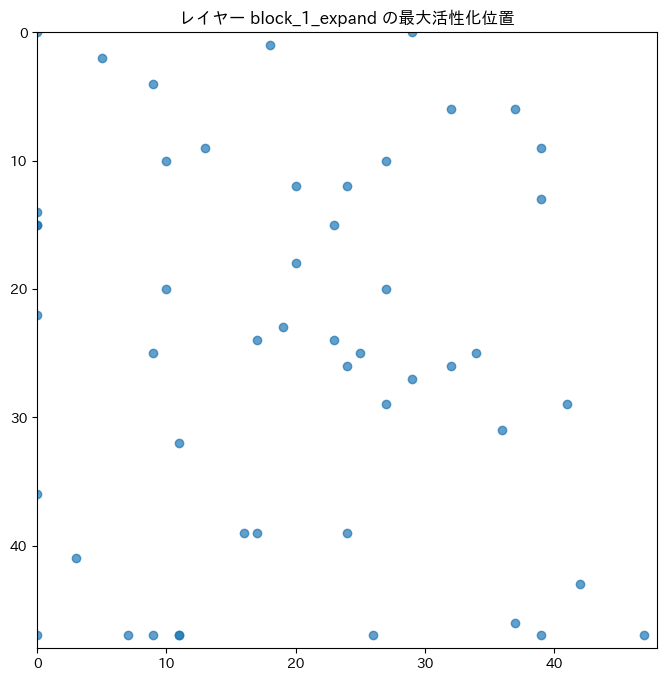

In [15]:
def analyze_layer_consistency(model, layer_name, dataset, num_samples=10):
    """特定の層の反応の一貫性を分析"""
    consistent_features = []
    
    for images, labels in dataset.take(num_samples):
        for i in range(images.shape[0]):
            image = images[i].numpy().astype("uint8")
            label = labels[i].numpy()
            img_array = tf.expand_dims(images[i], axis=0)
            
            # 特定のクラスの画像のみ分析
            if label < 0.5:  # 猫の場合
                heatmap = make_gradcam_heatmap(img_array, model, layer_name)
                
                # ヒートマップの最も活性化している領域を特定
                max_activation = np.unravel_index(np.argmax(heatmap), heatmap.shape)
                consistent_features.append(max_activation)
    
    # 結果を可視化
    x_coords = [pos[1] for pos in consistent_features]
    y_coords = [pos[0] for pos in consistent_features]
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, alpha=0.7)
    plt.title(f"レイヤー {layer_name} の最大活性化位置")
    plt.xlim(0, heatmap.shape[1])
    plt.ylim(0, heatmap.shape[0])
    plt.gca().invert_yaxis()  # 画像座標系に合わせる
    plt.show()

analyze_layer_consistency(model, "block_1_expand", test_dataset, num_samples=100)

畳み込み層 'block_6_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'block_12_expand' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
畳み込み層 'Conv_1' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


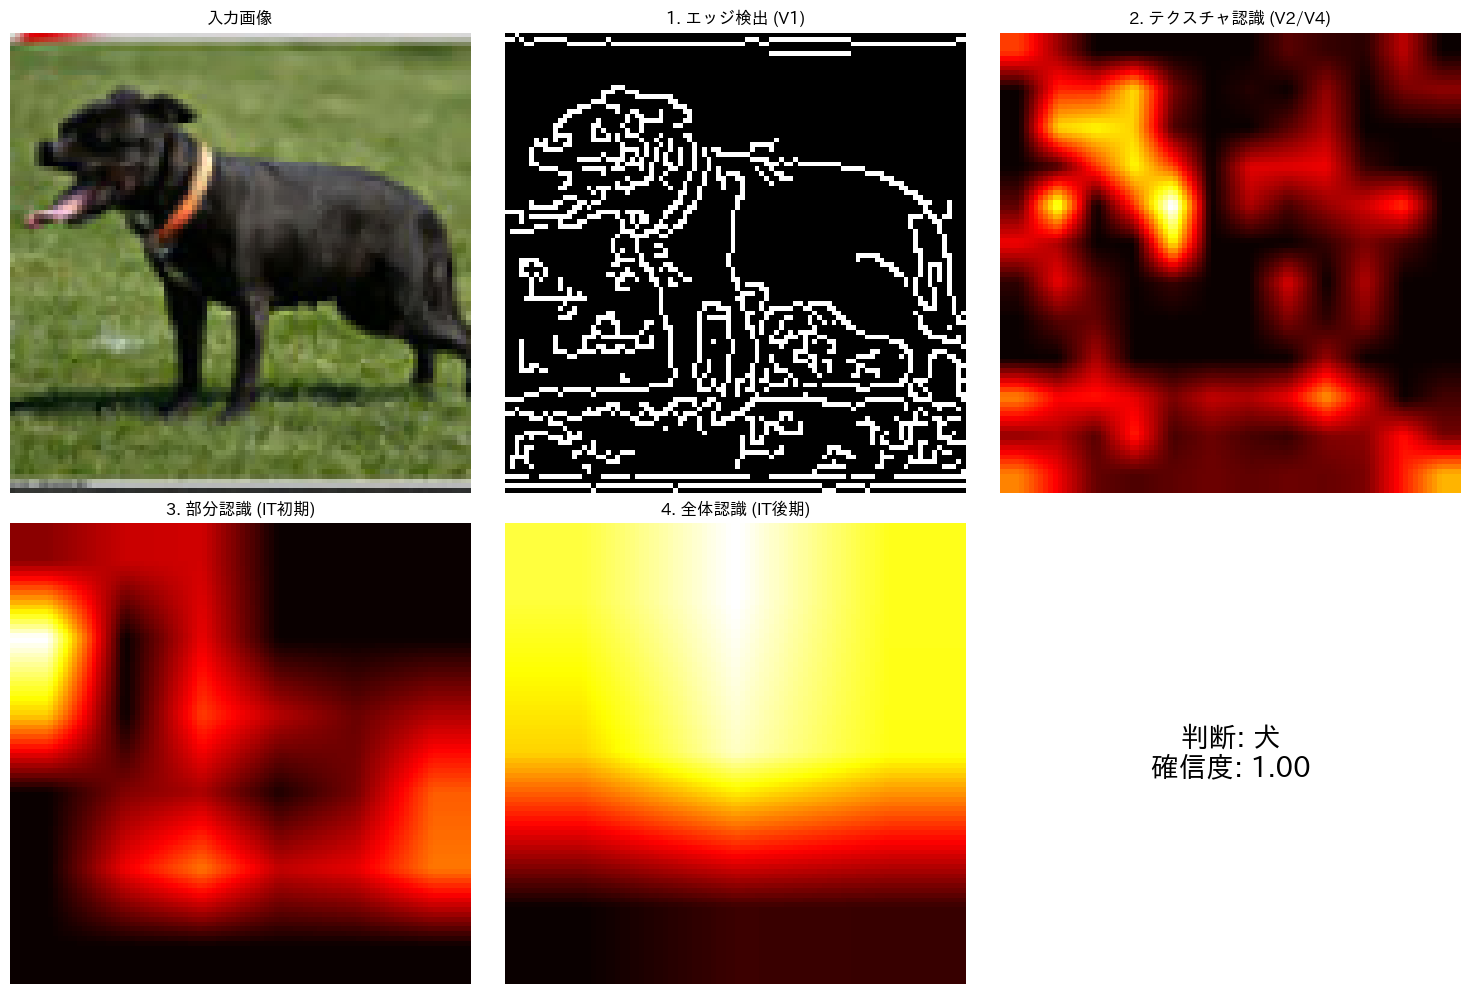

In [16]:
# 人間の視覚処理を模した「段階的な可視化」
def visualize_human_like_processing(img_array, model):
    """人間の視覚処理に似た段階的な処理を可視化"""
    # 1. エッジ検出（初期視覚野に相当）
    edges = cv2.Canny(image, 100, 200)
    
    # 2. 中間的特徴（V2, V4相当）- block_6_expandのヒートマップ
    mid_features = make_gradcam_heatmap(img_array, model, "block_6_expand")
    mid_features = cv2.resize(mid_features, (image.shape[1], image.shape[0]))
    
    # 3. 物体部分の認識（IT野の初期相当）- block_12_expandのヒートマップ
    part_recognition = make_gradcam_heatmap(img_array, model, "block_12_expand")
    part_recognition = cv2.resize(part_recognition, (image.shape[1], image.shape[0]))
    
    # 4. 全体認識（IT野の後期相当）- Conv_1のヒートマップ
    whole_recognition = make_gradcam_heatmap(img_array, model, "Conv_1")
    whole_recognition = cv2.resize(whole_recognition, (image.shape[1], image.shape[0]))
    
    # 5. 最終判断（前頭前野相当）- モデルの予測
    prediction = model.predict(img_array)[0][0]
    class_name = "犬" if prediction >= 0.5 else "猫"
    confidence = prediction if prediction >= 0.5 else 1 - prediction
    
    # 可視化
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title("入力画像")
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("1. エッジ検出 (V1)")
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(mid_features, cmap='hot')
    plt.title("2. テクスチャ認識 (V2/V4)")
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(part_recognition, cmap='hot')
    plt.title("3. 部分認識 (IT初期)")
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(whole_recognition, cmap='hot')
    plt.title("4. 全体認識 (IT後期)")
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.text(0.5, 0.5, f"判断: {class_name}\n確信度: {confidence:.2f}", 
             horizontalalignment='center', verticalalignment='center', fontsize=20)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_human_like_processing(img_array, model)


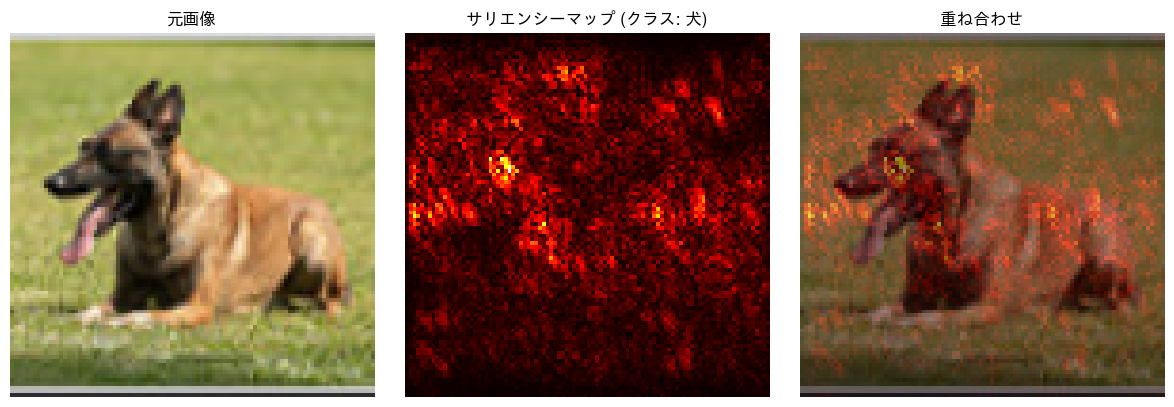

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib
import random

def get_saliency_map(model, img_array, class_idx=0):
    """サリエンシーマップを生成
    
    サリエンシーマップはモデルの出力に対する入力画像の勾配を計算し、
    どのピクセルが予測に最も影響を与えているかを可視化します。
    勾配の大きさが大きいほど、そのピクセルが予測に重要であることを示します。
    
    注意: このモデルはバイナリ分類（1チャンネル出力）なので、class_idxは0のみ有効です
    """
    # 入力画像のコピーを作成し、勾配を計算できるようにする
    img = tf.convert_to_tensor(img_array)
    
    with tf.GradientTape() as tape:
        # テープで入力を監視
        tape.watch(img)
        # モデルの予測
        preds = model(img)
        # バイナリ分類なのでインデックスなしで出力を取得
        # class_idxは無視します（このモデルはバイナリ分類）
        output = preds[:, 0]
    
    # 出力に対する入力の勾配を計算
    grads = tape.gradient(output, img)
    
    # 勾配の絶対値をとる
    abs_grads = tf.abs(grads)
    
    # チャンネル方向に最大値をとる（R,G,Bの各チャンネルの中で最も大きな影響を持つものを選択）
    saliency_map = tf.reduce_max(abs_grads, axis=-1)
    
    # 0-1の範囲に正規化
    saliency_map = saliency_map / tf.reduce_max(saliency_map)
    
    return saliency_map.numpy()[0]

def display_saliency_map(img, saliency_map, title="サリエンシーマップ"):
    """サリエンシーマップを表示"""
    # 元の画像サイズにリサイズ
    saliency_map_resized = cv2.resize(saliency_map, (img.shape[1], img.shape[0]))
    
    plt.figure(figsize=(12, 4))
    
    # 元の画像
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("元画像")
    plt.axis('off')
    
    # サリエンシーマップ
    plt.subplot(1, 3, 2)
    plt.imshow(saliency_map_resized, cmap='hot')
    plt.title(title)
    plt.axis('off')
    
    # 重ね合わせ
    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.imshow(saliency_map_resized, cmap='hot', alpha=0.5)
    plt.title("重ね合わせ")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# テストデータからランダムに画像を取得して可視化
for images, labels in test_dataset.shuffle(1000).take(1):
    # バッチからランダムにインデックスを選択
    random_idx = random.randint(0, images.shape[0]-1)
    
    # ランダムな画像を使用
    image = images[random_idx].numpy().astype("uint8")
    label = labels[random_idx].numpy()
    img_array = tf.expand_dims(images[random_idx], axis=0)
    
    # サリエンシーマップを計算（モデルはバイナリ分類なので、class_idxは無視されます）
    saliency_map = get_saliency_map(model, img_array)
    
    # 結果を表示
    class_name = "猫" if label < 0.5 else "犬"
    display_saliency_map(image, saliency_map, f"サリエンシーマップ (クラス: {class_name})")
    
    break

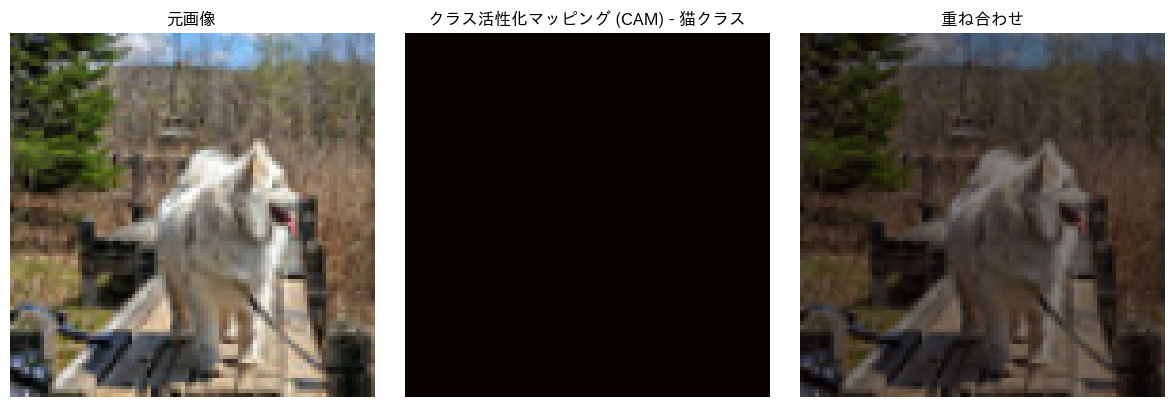

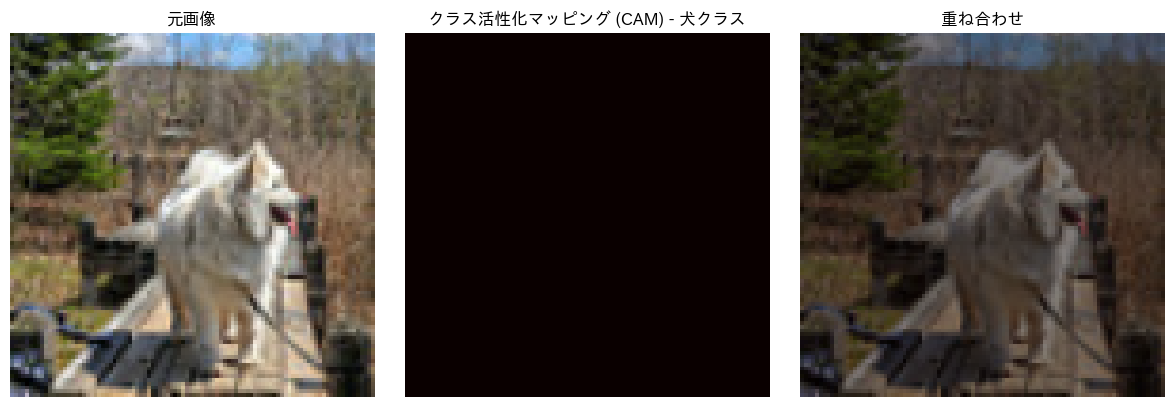

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib
import random

def get_class_activation_map(model, img_array, class_idx=0):
    """クラス活性化マッピング(CAM)の実装
    
    CAMは、特徴マップの重み付き和を計算し、
    モデルがどの領域に注目しているかを可視化します。
    Grad-CAMと異なり、CAMは特定のネットワーク構造を必要とします。
    この実装では、MobileNetV2の出力から特徴マップを抽出し、
    Global Average Poolingと全結合層を経て予測を行う仕組みを再現します。
    """
    # MobileNetV2ベースモデルを取得
    base_model = model.layers[0]
    
    # 指定の畳み込み層の出力を取得するモデルを作成
    feature_model = tf.keras.models.Model(
        inputs=base_model.input,
        outputs=base_model.get_layer("Conv_1").output  # 最後の畳み込み層の出力を取得
    )
    
    # 特徴マップを取得
    features = feature_model(img_array)
    
    # 元のモデルの最後の層（Dense層）の重みを取得
    dense_weights = model.layers[-1].get_weights()[0]
    
    # CAMを計算（特徴マップと最終層の重みを使用）
    cam = np.zeros(shape=features.shape[1:3], dtype=np.float32)
    for i, w in enumerate(dense_weights):
        # 各特徴マップに重みを掛けて合計
        cam += w[0] * features[0, :, :, i]
    
    # ReLUを適用（負の値を0にする）
    cam = np.maximum(cam, 0)
    
    # 0-1に正規化
    if np.max(cam) > 0:
        cam = cam / np.max(cam)
    
    return cam

def display_cam(img, cam, title="クラス活性化マッピング (CAM)"):
    """CAMを表示"""
    # 元の画像サイズにリサイズ
    cam_resized = cv2.resize(cam, (img.shape[1], img.shape[0]))
    
    plt.figure(figsize=(12, 4))
    
    # 元の画像
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("元画像")
    plt.axis('off')
    
    # CAM
    plt.subplot(1, 3, 2)
    plt.imshow(cam_resized, cmap='hot')
    plt.title(title)
    plt.axis('off')
    
    # 重ね合わせ
    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.imshow(cam_resized, cmap='hot', alpha=0.5)
    plt.title("重ね合わせ")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# テストデータからランダムに画像を取得して可視化
for images, labels in test_dataset.shuffle(1000).take(1):
    # バッチからランダムにインデックスを選択
    random_idx = random.randint(0, images.shape[0]-1)
    
    # ランダムな画像を使用
    image = images[random_idx].numpy().astype("uint8")
    label = labels[random_idx].numpy()
    img_array = tf.expand_dims(images[random_idx], axis=0)
    
    # 猫クラス(0)に対するCAMを計算
    cam = get_class_activation_map(model, img_array, class_idx=0)
    
    # 結果を表示
    display_cam(image, cam, "クラス活性化マッピング (CAM) - 猫クラス")
    
    # 犬クラス(1)に対するCAMも計算
    cam = get_class_activation_map(model, img_array, class_idx=1)
    
    # 結果を表示
    display_cam(image, cam, "クラス活性化マッピング (CAM) - 犬クラス")
    
    break

遮蔽感度分析を実行中... (少し時間がかかります)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

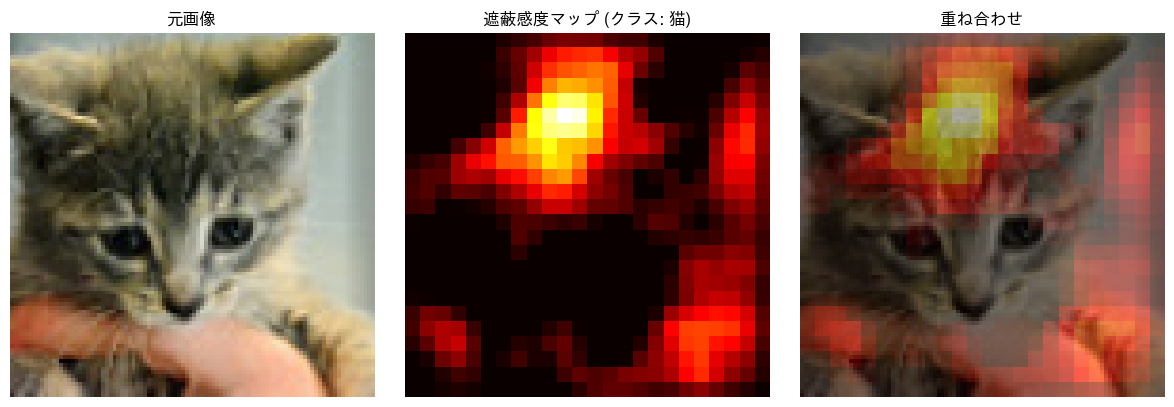

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib
import random

def occlusion_sensitivity(model, img_array, label, patch_size=10, stride=5):
    """遮蔽感度分析を実行
    
    遮蔽感度分析では、入力画像の一部を遮蔽（マスク）して
    予測がどう変化するかを観察します。
    予測に重要な領域を遮蔽すると、予測確率が大きく変化します。
    
    Args:
        model: 学習済みモデル
        img_array: 入力画像（バッチ次元付き）
        label: 正解ラベル（0=猫、1=犬）
        patch_size: 遮蔽するパッチのサイズ
        stride: パッチのスライド幅
        
    Returns:
        sensitivity_map: 感度マップ（高い値=重要な領域）
    """
    # 入力画像のコピーを作成
    image = img_array.numpy().copy()
    
    # 元画像の予測スコアを取得
    original_output = model.predict(img_array)[0][0]
    is_dog_prob = original_output
    target_prob = is_dog_prob if label == 1 else 1 - is_dog_prob
    
    # 画像のサイズを取得
    h, w = img_array.shape[1:3]
    
    # 感度マップの初期化
    sensitivity_map = np.zeros((h, w))
    
    # 各パッチを遮蔽して予測の変化を記録
    for y in range(0, h - patch_size + 1, stride):
        for x in range(0, w - patch_size + 1, stride):
            # 画像のコピーを作成
            occluded_image = image.copy()
            
            # パッチを灰色で遮蔽（RGB値をすべて128に設定）
            occluded_image[0, y:y+patch_size, x:x+patch_size, :] = 128
            
            # 遮蔽した画像での予測
            occluded_output = model.predict(tf.convert_to_tensor(occluded_image))[0][0]
            occluded_is_dog_prob = occluded_output
            occluded_target_prob = occluded_is_dog_prob if label == 1 else 1 - occluded_is_dog_prob
            
            # 元の予測との差分を記録（差が大きいほど重要な領域）
            diff = target_prob - occluded_target_prob
            sensitivity_map[y:y+patch_size, x:x+patch_size] += diff
    
    # 正規化（0-1の範囲に）
    sensitivity_map = np.maximum(sensitivity_map, 0)
    if np.max(sensitivity_map) > 0:
        sensitivity_map = sensitivity_map / np.max(sensitivity_map)
    
    return sensitivity_map

def display_occlusion_sensitivity(img, sensitivity_map, title="遮蔽感度マップ"):
    """遮蔽感度マップを表示"""
    # 元の画像サイズにリサイズ
    sensitivity_map_resized = cv2.resize(sensitivity_map, (img.shape[1], img.shape[0]))
    
    plt.figure(figsize=(12, 4))
    
    # 元の画像
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("元画像")
    plt.axis('off')
    
    # 感度マップ
    plt.subplot(1, 3, 2)
    plt.imshow(sensitivity_map_resized, cmap='hot')
    plt.title(title)
    plt.axis('off')
    
    # 重ね合わせ
    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.imshow(sensitivity_map_resized, cmap='hot', alpha=0.5)
    plt.title("重ね合わせ")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# テストデータからランダムに画像を取得して可視化
for images, labels in test_dataset.shuffle(1000).take(1):
    # バッチからランダムにインデックスを選択
    random_idx = random.randint(0, images.shape[0]-1)
    
    # ランダムな画像を使用
    image = images[random_idx].numpy().astype("uint8")
    label = labels[random_idx].numpy()
    img_array = tf.expand_dims(images[random_idx], axis=0)
    
    # 計算には時間がかかるため、小さなパッチサイズとストライドを使用
    print("遮蔽感度分析を実行中... (少し時間がかかります)")
    sensitivity_map = occlusion_sensitivity(model, img_array, label, patch_size=8, stride=4)
    
    # 結果を表示
    class_name = "猫" if label < 0.5 else "犬"
    display_occlusion_sensitivity(image, sensitivity_map, f"遮蔽感度マップ (クラス: {class_name})")
    
    break

各層の活性化を可視化しています...


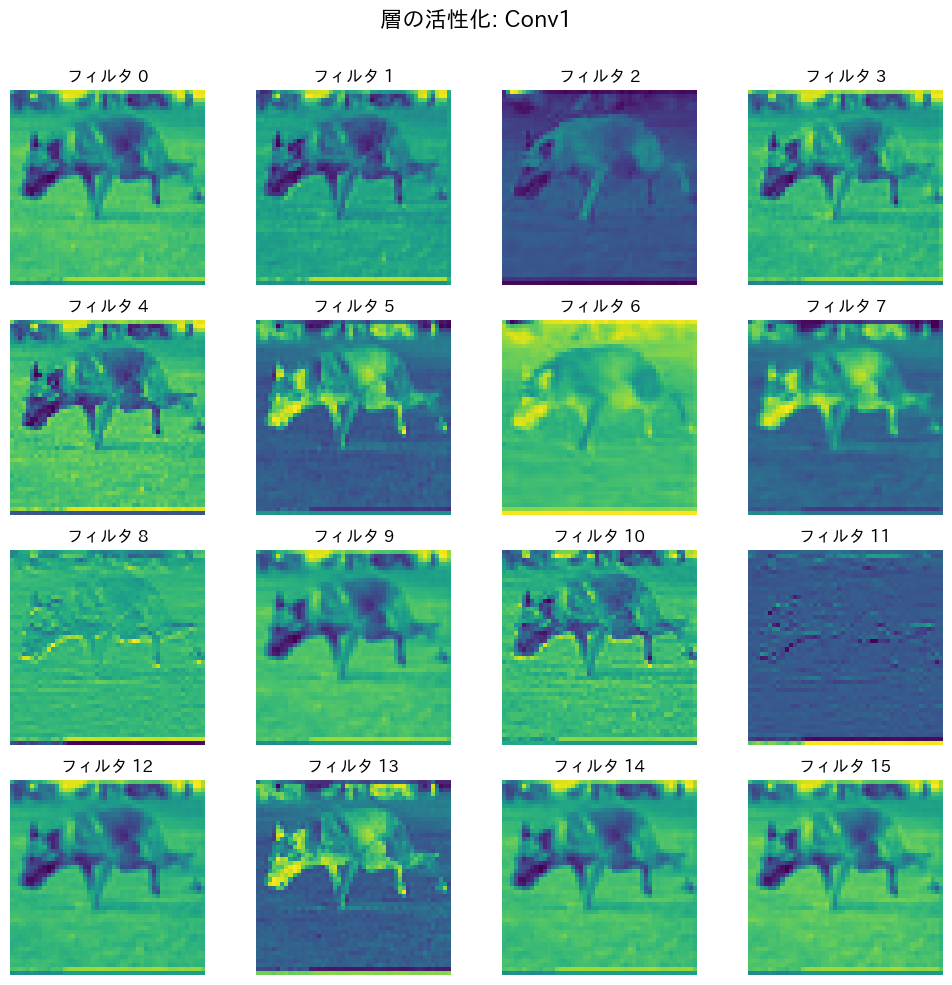

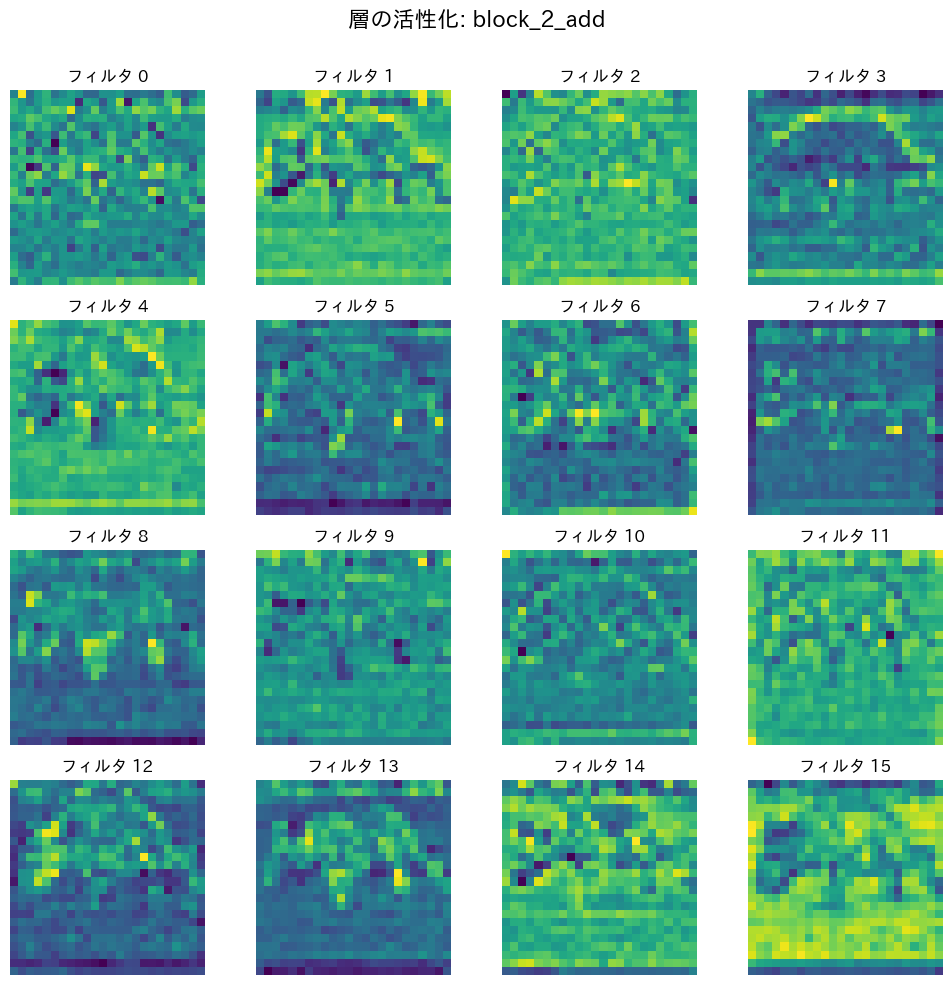

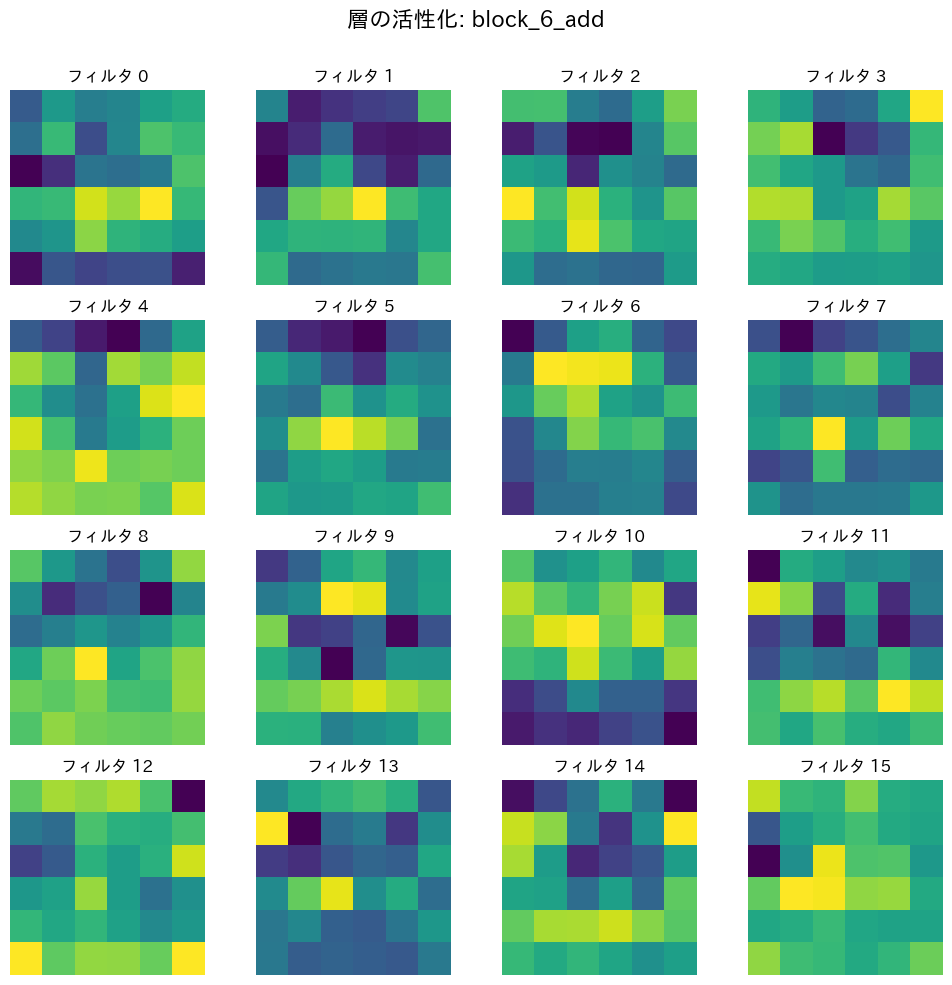

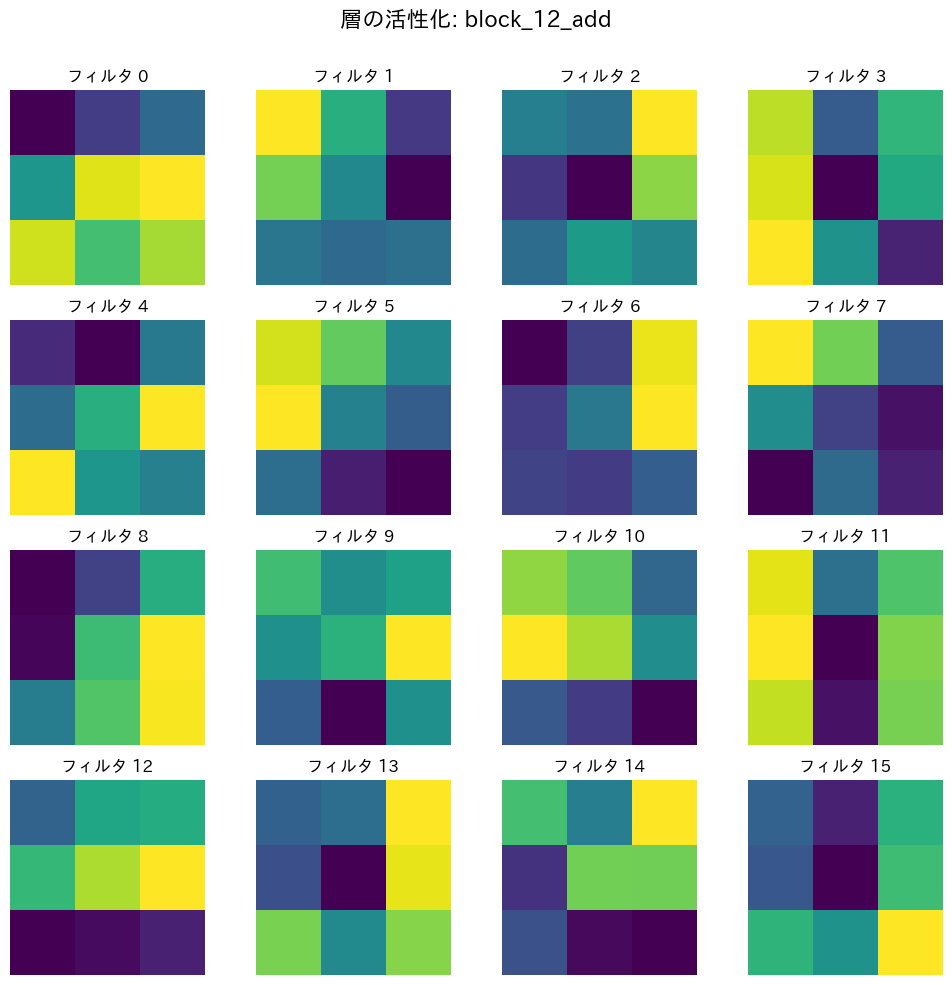

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib
import random

def visualize_layer_activations(model, img_array, layer_names=None):
    """CNNの各層の活性化を可視化
    
    CNNの各層がどのような特徴を検出しているかを可視化します。
    浅い層は単純な特徴（エッジ、テクスチャなど）を、
    深い層はより複雑な特徴（パーツ、物体など）を検出します。
    
    Args:
        model: 学習済みモデル
        img_array: 入力画像（バッチ次元付き）
        layer_names: 可視化する層の名前のリスト（Noneの場合は自動選択）
        
    Returns:
        None（グラフをプロット）
    """
    # MobileNetV2ベースモデルを取得
    base_model = model.layers[0]
    
    # 層が指定されていない場合、代表的な層を選択
    if layer_names is None:
        layer_names = [
            "Conv1",  # 最初の層
            "block_1_expand", # 浅い層
            "block_6_expand", # 中間層
            "block_12_expand", # 深い層
            "block_16_project", # より深い層
            "Conv_1" # 最後の層
        ]
    
    # 各層の活性化を取得するための複数の出力を持つモデルを作成
    outputs = [base_model.get_layer(name).output for name in layer_names if name in [layer.name for layer in base_model.layers]]
    activation_model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)
    
    # 活性化を取得
    activations = activation_model(img_array)
    if not isinstance(activations, list):
        activations = [activations]  # 単一の出力の場合リストに変換
    
    # 各層の活性化を可視化
    for i, activation in enumerate(activations):
        layer_name = layer_names[i] if i < len(layer_names) else f"Layer {i}"
        n_features = activation.shape[-1]  # フィルタ数
        
        # 画像サイズが小さすぎる場合はスキップ
        if activation.shape[1] < 2 or activation.shape[2] < 2:
            print(f"スキップ: {layer_name} - サイズが小さすぎます ({activation.shape[1]}x{activation.shape[2]})")
            continue
        
        # 最大16個のフィルタを表示（あるいはすべて、少ない方）
        n_filters_to_show = min(16, n_features)
        size = activation.shape[1]  # 特徴マップのサイズ
        
        # サブプロットの行と列を計算
        n_cols = 4
        n_rows = int(np.ceil(n_filters_to_show / n_cols))
        
        plt.figure(figsize=(n_cols * 2.5, n_rows * 2.5))
        plt.suptitle(f"層の活性化: {layer_name}", fontsize=16)
        
        for j in range(n_filters_to_show):
            plt.subplot(n_rows, n_cols, j + 1)
            # 特徴マップを取得
            feature_map = activation[0, :, :, j].numpy()
            # 0-1に正規化
            if np.max(feature_map) > 0:
                feature_map = feature_map / np.max(feature_map)
            plt.imshow(feature_map, cmap='viridis')
            plt.title(f"フィルタ {j}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)  # タイトル用のスペース確保
        plt.show()

# テストデータからランダムに画像を取得して可視化
for images, labels in test_dataset.shuffle(1000).take(1):
    # バッチからランダムにインデックスを選択
    random_idx = random.randint(0, images.shape[0]-1)
    
    # ランダムな画像を使用
    image = images[random_idx].numpy().astype("uint8")
    label = labels[random_idx].numpy()
    img_array = tf.expand_dims(images[random_idx], axis=0)
    
    # 代表的な層を選択
    selected_layers = [
        "Conv1",       # 最初の畳み込み層
        "block_2_add", # 浅い層の残差接続
        "block_6_add", # 中間層の残差接続
        "block_12_add", # 深い層の残差接続
        "Conv_1"       # 最後の畳み込み層
    ]
    
    # 層の活性化を可視化
    print("各層の活性化を可視化しています...")
    visualize_layer_activations(model, img_array, selected_layers)
    
    break

LIME風解析を実行中（scikit-image不要版）...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━

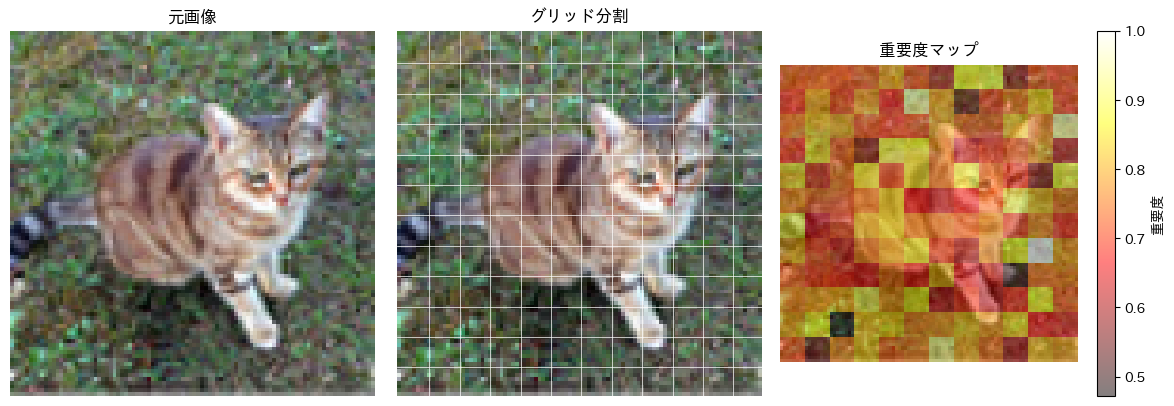

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib
import random

# LIME風の可視化を実装（scikit-imageに依存しない簡易版）
def simple_lime_without_skimage(model, img_array, num_samples=100, grid_size=16):
    """LIME風の簡易可視化（scikit-image不要）
    
    scikit-imageを使わず、グリッド分割による簡易的なLIME実装
    
    Args:
        model: 学習済みモデル
        img_array: 入力画像（バッチ次元付き）
        num_samples: サンプル数
        grid_size: グリッドのサイズ（画像をいくつに分割するか）
    """
    # 画像をnumpy配列に変換
    image = img_array[0].numpy().astype(np.uint8)
    h, w = image.shape[:2]
    
    # 元画像の予測スコアを取得
    original_prediction = model.predict(img_array)[0][0]
    
    # グリッドベースのセグメンテーション
    segments = np.zeros((h, w), dtype=np.int32)
    block_h = h // grid_size
    block_w = w // grid_size
    
    # グリッドIDを割り当て
    for i in range(grid_size):
        for j in range(grid_size):
            segments[i*block_h:(i+1)*block_h, j*block_w:(j+1)*block_w] = i * grid_size + j
    
    num_segments = grid_size * grid_size
    
    # 重要度スコア記録用の配列を初期化
    segment_importances = np.zeros(num_segments)
    
    # サンプリング
    for i in range(num_samples):
        # ランダムにセグメントをマスク
        active_segments = np.random.binomial(1, 0.5, num_segments)
        
        # マスクされた画像を作成
        perturbed_image = np.copy(image)
        
        # マスクを適用
        for j in range(num_segments):
            if active_segments[j] == 0:  # セグメントを非アクティブにする
                perturbed_image[segments == j] = 128  # グレー色でマスク
        
        # マスクされた画像で予測
        perturbed_input = tf.expand_dims(perturbed_image, 0)
        perturbed_prediction = model.predict(perturbed_input)[0][0]
        
        # 元の予測との差を重要度として記録
        prediction_diff = original_prediction - perturbed_prediction
        for j in range(num_segments):
            if active_segments[j] == 0:  # 非アクティブなセグメントの影響を記録
                segment_importances[j] += prediction_diff
    
    # 平均を取る
    segment_importances = segment_importances / num_samples
    
    # 絶対値の最大値で正規化
    max_abs_importance = np.max(np.abs(segment_importances))
    if max_abs_importance > 0:
        segment_importances = segment_importances / max_abs_importance
    
    return segment_importances, segments

def display_lime_explanation_grid(img, segment_importances, segments):
    """LIME風の説明を可視化（グリッドベース）"""
    plt.figure(figsize=(12, 4))
    
    # 元の画像
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("元画像")
    plt.axis('off')
    
    # グリッド表示
    plt.subplot(1, 3, 2)
    plt.imshow(img)
    
    # グリッドの境界を表示
    h, w = segments.shape
    grid_size = int(np.sqrt(np.max(segments) + 1))
    block_h = h // grid_size
    block_w = w // grid_size
    
    # 水平線
    for i in range(1, grid_size):
        y = i * block_h
        plt.axhline(y=y, color='white', linestyle='-', linewidth=0.5)
    
    # 垂直線
    for j in range(1, grid_size):
        x = j * block_w
        plt.axvline(x=x, color='white', linestyle='-', linewidth=0.5)
    
    plt.title("グリッド分割")
    plt.axis('off')
    
    # 重要度マップ
    plt.subplot(1, 3, 3)
    importance_map = np.zeros(img.shape[:2])
    for i in range(len(segment_importances)):
        importance_map[segments == i] = segment_importances[i]
    
    plt.imshow(img)
    plt.imshow(np.abs(importance_map), cmap='hot', alpha=0.5)
    plt.title("重要度マップ")
    plt.colorbar(label='重要度')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# テストデータからランダムに画像を取得して可視化
for images, labels in test_dataset.shuffle(1000).take(1):
    # バッチからランダムにインデックスを選択
    random_idx = random.randint(0, images.shape[0]-1)
    
    # ランダムな画像を使用
    image = images[random_idx].numpy().astype("uint8")
    label = labels[random_idx].numpy()
    img_array = tf.expand_dims(images[random_idx], axis=0)
    
    print("LIME風解析を実行中（scikit-image不要版）...")
    
    # グリッドベースのLIME実行（scikit-image不要）
    segment_importances, segments = simple_lime_without_skimage(
        model, img_array, num_samples=100, grid_size=12)
    
    # 結果の表示
    display_lime_explanation_grid(image, segment_importances, segments)
    
    break

簡易版Guided Backpropagationを実行中...


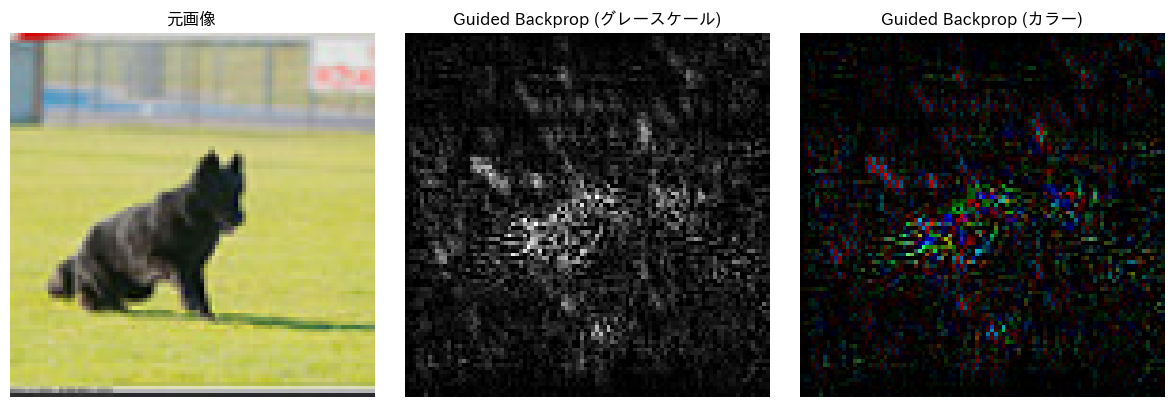

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib
import random

# より単純なGuided Backpropagation実装
def simple_guided_backprop(model, img_array):
    """シンプル化したGuided Backpropagation実装
    
    標準のTensorFlow勾配テープを使用した簡易版Guided Backpropagation。
    モデルのカスタマイズが必要ない代わりに、完全なGuided Backpropagationではありません。
    """
    # 入力画像のコピーを作成
    img = tf.convert_to_tensor(img_array, dtype=tf.float32)
    
    # 勾配を計算
    with tf.GradientTape() as tape:
        # 入力を監視
        tape.watch(img)
        # モデルの予測（バイナリ分類）
        prediction = model(img)[:, 0]
    
    # 出力に対する入力の勾配を計算
    grads = tape.gradient(prediction, img)
    
    # エラーチェック
    if grads is None:
        print("警告：勾配がNoneです。モデルの接続に問題があるかもしれません。")
        # ダミーの勾配を返す
        return np.zeros_like(img_array[0])
    
    # Guided Backpropの近似：正の勾配のみを保持
    # 通常のGuided Backpropagationは正の入力と正の勾配の両方を必要としますが、
    # ここでは勾配の符号のみを考慮します
    guided_grads = np.maximum(grads.numpy()[0], 0)
    
    return guided_grads

def display_guided_backprop(img, guided_grads):
    """ガイド付きバックプロップの結果を表示"""
    # RGB各チャンネルの勾配の絶対値を取得
    abs_grads = np.abs(guided_grads)
    
    # チャンネルごとの最大値で正規化
    for i in range(3):  # RGB各チャンネル
        channel_max = np.max(abs_grads[..., i])
        if channel_max > 0:
            abs_grads[..., i] /= channel_max
    
    plt.figure(figsize=(12, 4))
    
    # 元の画像
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("元画像")
    plt.axis('off')
    
    # ガイド付きバックプロップ（グレースケール）
    plt.subplot(1, 3, 2)
    gb_gray = np.max(abs_grads, axis=2)  # RGB最大値を使用
    plt.imshow(gb_gray, cmap='gray')
    plt.title("Guided Backprop (グレースケール)")
    plt.axis('off')
    
    # ガイド付きバックプロップ（カラー）
    plt.subplot(1, 3, 3)
    plt.imshow(abs_grads)
    plt.title("Guided Backprop (カラー)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# テストデータからランダムに画像を取得して可視化
for images, labels in test_dataset.shuffle(1000).take(1):
    # バッチからランダムにインデックスを選択
    random_idx = random.randint(0, images.shape[0]-1)
    
    # ランダムな画像を使用
    image = images[random_idx].numpy().astype("uint8")
    label = labels[random_idx].numpy()
    img_array = tf.expand_dims(images[random_idx], axis=0)
    
    # 簡易版Guided Backpropを実行
    print("簡易版Guided Backpropagationを実行中...")
    guided_grads = simple_guided_backprop(model, img_array)
    
    # 結果を表示
    display_guided_backprop(image, guided_grads)
    
    break

積分勾配法を計算中...


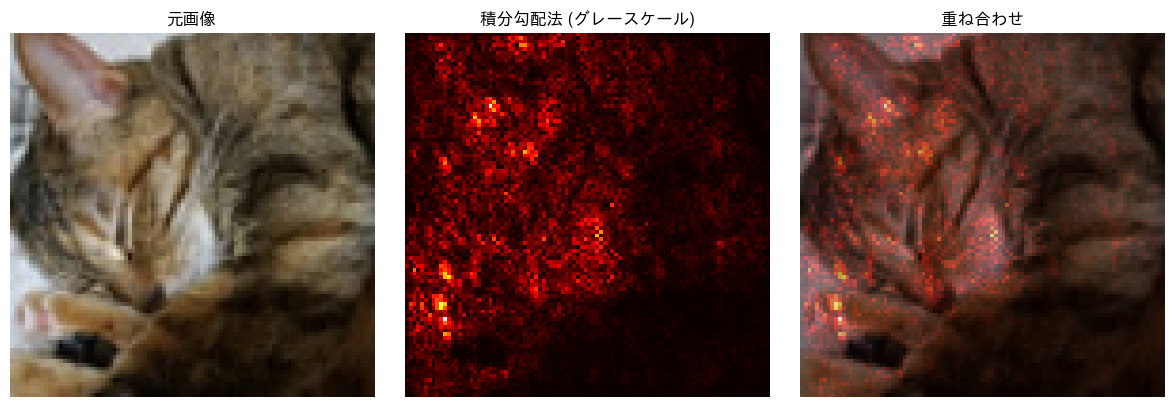

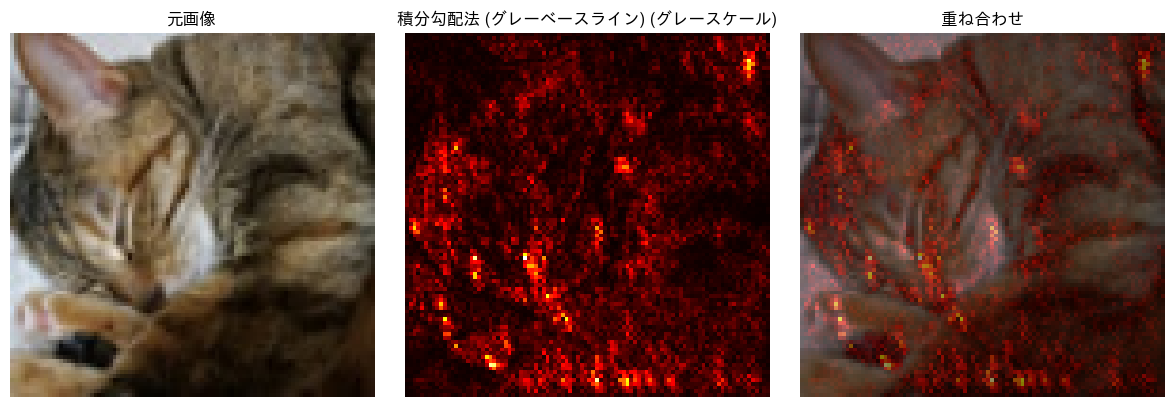

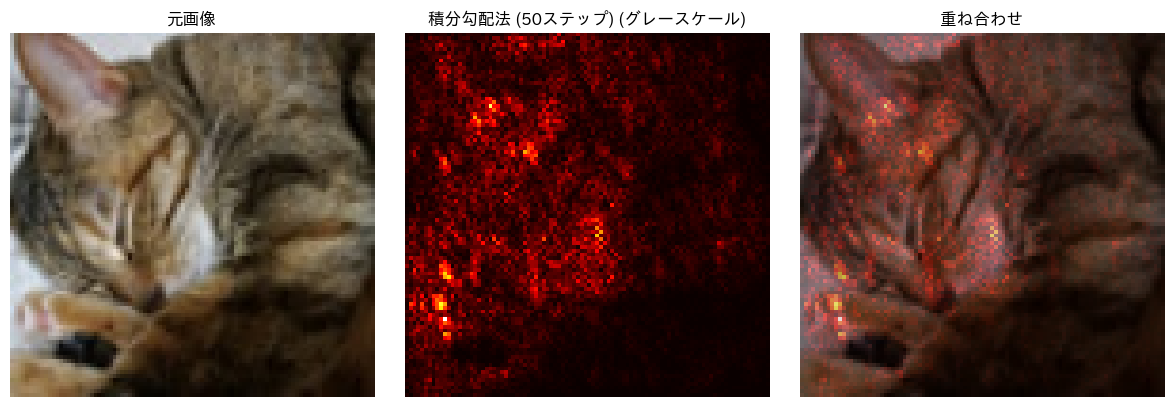

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib
import random

def integrated_gradients(model, img_array, baseline=None, steps=50):
    """積分勾配法を実装（バイナリ分類モデル用に修正）
    
    積分勾配法は入力の重要度を測定する手法で、
    ベースライン画像（通常は黒画像）から実際の入力画像までの
    直線経路に沿った勾配の積分を計算します。
    これにより、予測に対する各ピクセルの寄与度を測定できます。
    
    Args:
        model: 学習済みモデル
        img_array: 入力画像（バッチ次元付き）
        baseline: ベースライン画像（Noneの場合は黒画像）
        steps: 積分のステップ数
        
    Returns:
        integrated_grads: 積分勾配
    """
    # 入力画像のコピーを作成
    img = tf.convert_to_tensor(img_array)
    
    # ベースライン画像を設定（デフォルトは黒画像）
    if baseline is None:
        baseline = tf.zeros_like(img)
    else:
        baseline = tf.convert_to_tensor(baseline)
    
    # 入力とベースラインの差分
    diff = img - baseline
    
    # 積分のためのステップを生成
    step_list = [baseline + (float(i) / steps) * diff for i in range(steps + 1)]
    step_list = tf.concat(step_list, axis=0)
    
    # バッチ処理のために入力を準備
    batch_size = steps + 1
    
    # 各ステップでの勾配を計算
    with tf.GradientTape() as tape:
        tape.watch(step_list)
        outputs = model(step_list)
        # このモデルはバイナリ分類（1チャンネル出力）
        target_outputs = outputs[:, 0]  # インデックス0のみ有効
    
    # 勾配を取得
    gradients = tape.gradient(target_outputs, step_list)
    
    # 元のバッチサイズに戻す
    gradients = tf.reshape(gradients, [batch_size] + list(img_array.shape[1:]))
    
    # 台形則で積分を近似
    avg_grads = (gradients[:-1] + gradients[1:]) / 2.0
    avg_grads = tf.reduce_mean(avg_grads, axis=0)
    
    # 積分勾配を計算
    integrated_grads = diff[0] * avg_grads
    
    return integrated_grads.numpy()

def display_integrated_gradients(img, integrated_grads, title="積分勾配法"):
    """積分勾配の結果を表示"""
    # RGB各チャンネルの勾配の絶対値を取得
    abs_grads = np.abs(integrated_grads)
    
    # チャンネルごとの最大値で正規化
    for i in range(3):  # RGB各チャンネル
        channel_max = np.max(abs_grads[..., i])
        if channel_max > 0:
            abs_grads[..., i] /= channel_max
    
    # 全チャンネルの平均を取る（グレースケール表示用）
    grayscale_grads = np.mean(abs_grads, axis=2)
    
    plt.figure(figsize=(12, 4))
    
    # 元の画像
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("元画像")
    plt.axis('off')
    
    # 積分勾配（グレースケール）
    plt.subplot(1, 3, 2)
    plt.imshow(grayscale_grads, cmap='hot')
    plt.title(f"{title} (グレースケール)")
    plt.axis('off')
    
    # 積分勾配（元画像に重ね合わせ）
    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.imshow(grayscale_grads, cmap='hot', alpha=0.5)
    plt.title("重ね合わせ")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# テストデータからランダムに画像を取得して可視化
for images, labels in test_dataset.shuffle(1000).take(1):
    # バッチからランダムにインデックスを選択
    random_idx = random.randint(0, images.shape[0]-1)
    
    # ランダムな画像を使用
    image = images[random_idx].numpy().astype("uint8")
    label = labels[random_idx].numpy()
    img_array = tf.expand_dims(images[random_idx], axis=0)
    
    # 積分勾配法を実行
    print("積分勾配法を計算中...")
    
    # 標準の積分勾配を計算
    ig = integrated_gradients(model, img_array, steps=20)
    display_integrated_gradients(image, ig, "積分勾配法")
    
    # 異なるベースラインでも試す（グレー画像）
    gray_baseline = tf.ones_like(img_array) * 128
    ig_gray = integrated_gradients(model, img_array, baseline=gray_baseline, steps=20)
    display_integrated_gradients(image, ig_gray, "積分勾配法 (グレーベースライン)")
    
    # より多くのステップ数で実験
    ig_more_steps = integrated_gradients(model, img_array, steps=50)
    display_integrated_gradients(image, ig_more_steps, "積分勾配法 (50ステップ)")
    
    break

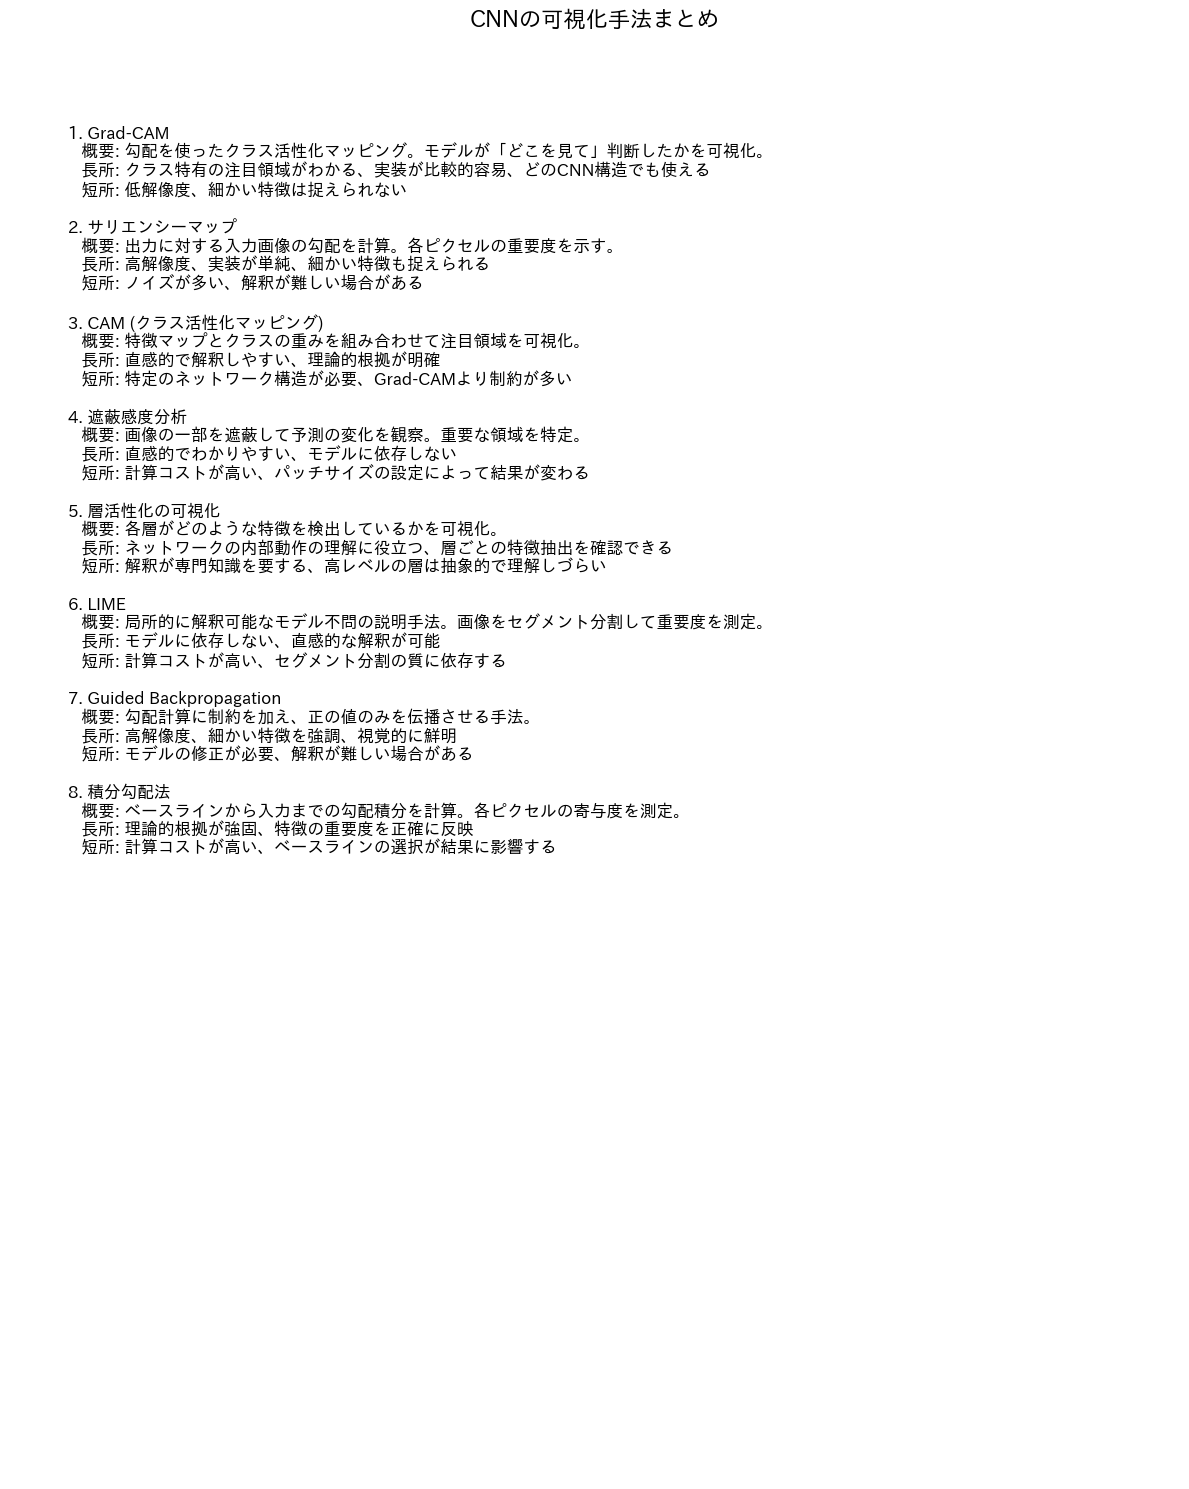

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib

# CNNの可視化手法まとめ
def visualization_summary():
    """CNNの可視化手法のまとめ"""
    methods = [
        {
            "name": "Grad-CAM",
            "desc": "勾配を使ったクラス活性化マッピング。モデルが「どこを見て」判断したかを可視化。",
            "pros": "クラス特有の注目領域がわかる、実装が比較的容易、どのCNN構造でも使える",
            "cons": "低解像度、細かい特徴は捉えられない"
        },
        {
            "name": "サリエンシーマップ",
            "desc": "出力に対する入力画像の勾配を計算。各ピクセルの重要度を示す。",
            "pros": "高解像度、実装が単純、細かい特徴も捉えられる",
            "cons": "ノイズが多い、解釈が難しい場合がある"
        },
        {
            "name": "CAM (クラス活性化マッピング)",
            "desc": "特徴マップとクラスの重みを組み合わせて注目領域を可視化。",
            "pros": "直感的で解釈しやすい、理論的根拠が明確",
            "cons": "特定のネットワーク構造が必要、Grad-CAMより制約が多い"
        },
        {
            "name": "遮蔽感度分析",
            "desc": "画像の一部を遮蔽して予測の変化を観察。重要な領域を特定。",
            "pros": "直感的でわかりやすい、モデルに依存しない",
            "cons": "計算コストが高い、パッチサイズの設定によって結果が変わる"
        },
        {
            "name": "層活性化の可視化",
            "desc": "各層がどのような特徴を検出しているかを可視化。",
            "pros": "ネットワークの内部動作の理解に役立つ、層ごとの特徴抽出を確認できる",
            "cons": "解釈が専門知識を要する、高レベルの層は抽象的で理解しづらい"
        },
        {
            "name": "LIME",
            "desc": "局所的に解釈可能なモデル不問の説明手法。画像をセグメント分割して重要度を測定。",
            "pros": "モデルに依存しない、直感的な解釈が可能",
            "cons": "計算コストが高い、セグメント分割の質に依存する"
        },
        {
            "name": "Guided Backpropagation",
            "desc": "勾配計算に制約を加え、正の値のみを伝播させる手法。",
            "pros": "高解像度、細かい特徴を強調、視覚的に鮮明",
            "cons": "モデルの修正が必要、解釈が難しい場合がある"
        },
        {
            "name": "積分勾配法",
            "desc": "ベースラインから入力までの勾配積分を計算。各ピクセルの寄与度を測定。",
            "pros": "理論的根拠が強固、特徴の重要度を正確に反映",
            "cons": "計算コストが高い、ベースラインの選択が結果に影響する"
        }
    ]
    
    plt.figure(figsize=(12, 15))
    plt.axis('off')
    plt.title("CNNの可視化手法まとめ", fontsize=16)
    
    text = ""
    for i, method in enumerate(methods):
        text += f"\n{i+1}. {method['name']}\n"
        text += f"   概要: {method['desc']}\n"
        text += f"   長所: {method['pros']}\n"
        text += f"   短所: {method['cons']}\n"
    
    plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, fontsize=12, 
             verticalalignment='top', wrap=True)
    
    plt.tight_layout()
    plt.show()

# 各手法の特徴をまとめて表示
visualization_summary()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import japanize_matplotlib
import random

# CNNの可視化手法を比較
def compare_visualization_methods(model, test_dataset=None):
    """様々な可視化手法を比較
    
    異なる可視化手法の結果を並べて表示し、
    それぞれの特徴や違いを比較します。
    毎回実行するたびに、テストデータセットからランダムに異なる画像を選んで表示します。
    
    Args:
        model: 学習済みモデル
        test_dataset: テストデータセット（指定しない場合はグローバル変数のtest_datasetを使用）
    """
    # テストデータからランダムに画像を取得
    for images, labels in test_dataset.shuffle(1000).take(1):
        # バッチからランダムにインデックスを選択
        random_idx = random.randint(0, images.shape[0]-1)
        
        # ランダムな画像を使用
        image = images[random_idx].numpy().astype("uint8")
        label = labels[random_idx].numpy()
        img_array = tf.expand_dims(images[random_idx], axis=0)
        
        print(f"選択された画像のラベル: {'猫' if label < 0.5 else '犬'}")
        
        # 1. Grad-CAM
        conv_layer_name = "Conv_1"  # MobileNetV2の最後の畳み込み層
        gradcam_heatmap = make_gradcam_heatmap(img_array, model, conv_layer_name)
        gradcam_heatmap_resized = cv2.resize(gradcam_heatmap, (image.shape[1], image.shape[0]))
        
        # 2. サリエンシーマップ（注：このモデルはバイナリ分類なのでclass_idxは無視される）
        saliency_map = get_saliency_map(model, img_array)
        
        # 3. クラス活性化マッピング(CAM)
        # このモデルはバイナリ分類なので、class_idx=0を使用
        cam = get_class_activation_map(model, img_array, class_idx=0)
        cam_resized = cv2.resize(cam, (image.shape[1], image.shape[0]))
        
        # 4. 遮蔽感度分析（計算に時間がかかるため低解像度で実行）
        print("遮蔽感度分析を計算中（簡易版）...")
        occlusion_map = occlusion_sensitivity(model, img_array, label, patch_size=12, stride=8)
        occlusion_map_resized = cv2.resize(occlusion_map, (image.shape[1], image.shape[0]))
        
        # 5. 簡易版Guided Backpropagation
        print("簡易版Guided Backpropを計算中...")
        guided_grads = simple_guided_backprop(model, img_array)
        guided_grads_gray = np.mean(np.abs(guided_grads), axis=2)
        guided_grads_gray = guided_grads_gray / np.max(guided_grads_gray) if np.max(guided_grads_gray) > 0 else guided_grads_gray
        
        # 6. 積分勾配法
        print("積分勾配法を計算中...")
        ig_grads = integrated_gradients(model, img_array, steps=10)
        ig_grads_gray = np.mean(np.abs(ig_grads), axis=2)
        ig_grads_gray = ig_grads_gray / np.max(ig_grads_gray) if np.max(ig_grads_gray) > 0 else ig_grads_gray
        
        # 結果の可視化
        plt.figure(figsize=(15, 10))
        
        # 元画像
        plt.subplot(2, 4, 1)
        plt.imshow(image)
        plt.title("元画像")
        plt.axis('off')
        
        # Grad-CAM
        plt.subplot(2, 4, 2)
        plt.imshow(image)
        plt.imshow(gradcam_heatmap_resized, cmap='hot', alpha=0.5)
        plt.title("Grad-CAM")
        plt.axis('off')
        
        # サリエンシーマップ
        plt.subplot(2, 4, 3)
        plt.imshow(image)
        plt.imshow(saliency_map, cmap='hot', alpha=0.5)
        plt.title("サリエンシーマップ")
        plt.axis('off')
        
        # CAM
        plt.subplot(2, 4, 4)
        plt.imshow(image)
        plt.imshow(cam_resized, cmap='hot', alpha=0.5)
        plt.title("クラス活性化マッピング(CAM)")
        plt.axis('off')
        
        # 遮蔽感度
        plt.subplot(2, 4, 5)
        plt.imshow(image)
        plt.imshow(occlusion_map_resized, cmap='hot', alpha=0.5)
        plt.title("遮蔽感度分析")
        plt.axis('off')
        
        # Guided Backpropagation
        plt.subplot(2, 4, 6)
        plt.imshow(guided_grads_gray, cmap='gray')
        plt.title("Guided Backpropagation")
        plt.axis('off')
        
        # 積分勾配法
        plt.subplot(2, 4, 7)
        plt.imshow(image)
        plt.imshow(ig_grads_gray, cmap='hot', alpha=0.5)
        plt.title("積分勾配法")
        plt.axis('off')
        
        # 結論
        plt.subplot(2, 4, 8)
        plt.text(0.5, 0.5, "各可視化手法の特徴:\n\nGrad-CAM: クラス固有の重要領域\nサリエンシー: 細かい特徴の検出\nCAM: 大まかな注目領域\n遮蔽感度: 物体の重要部分\nGuided Backprop: エッジや細部の強調\n積分勾配法: ピクセル単位の寄与度", 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=10,
                transform=plt.gca().transAxes)
        plt.axis('off')
        
        plt.suptitle(f"CNNの可視化手法の比較 (クラス: {'猫' if label < 0.5 else '犬'})", fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()

選択された画像のラベル: 猫
畳み込み層 'Conv_1' が見つかりました
勾配の型: <class 'tensorflow.python.framework.ops.EagerTensor'>
遮蔽感度分析を計算中（簡易版）...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━

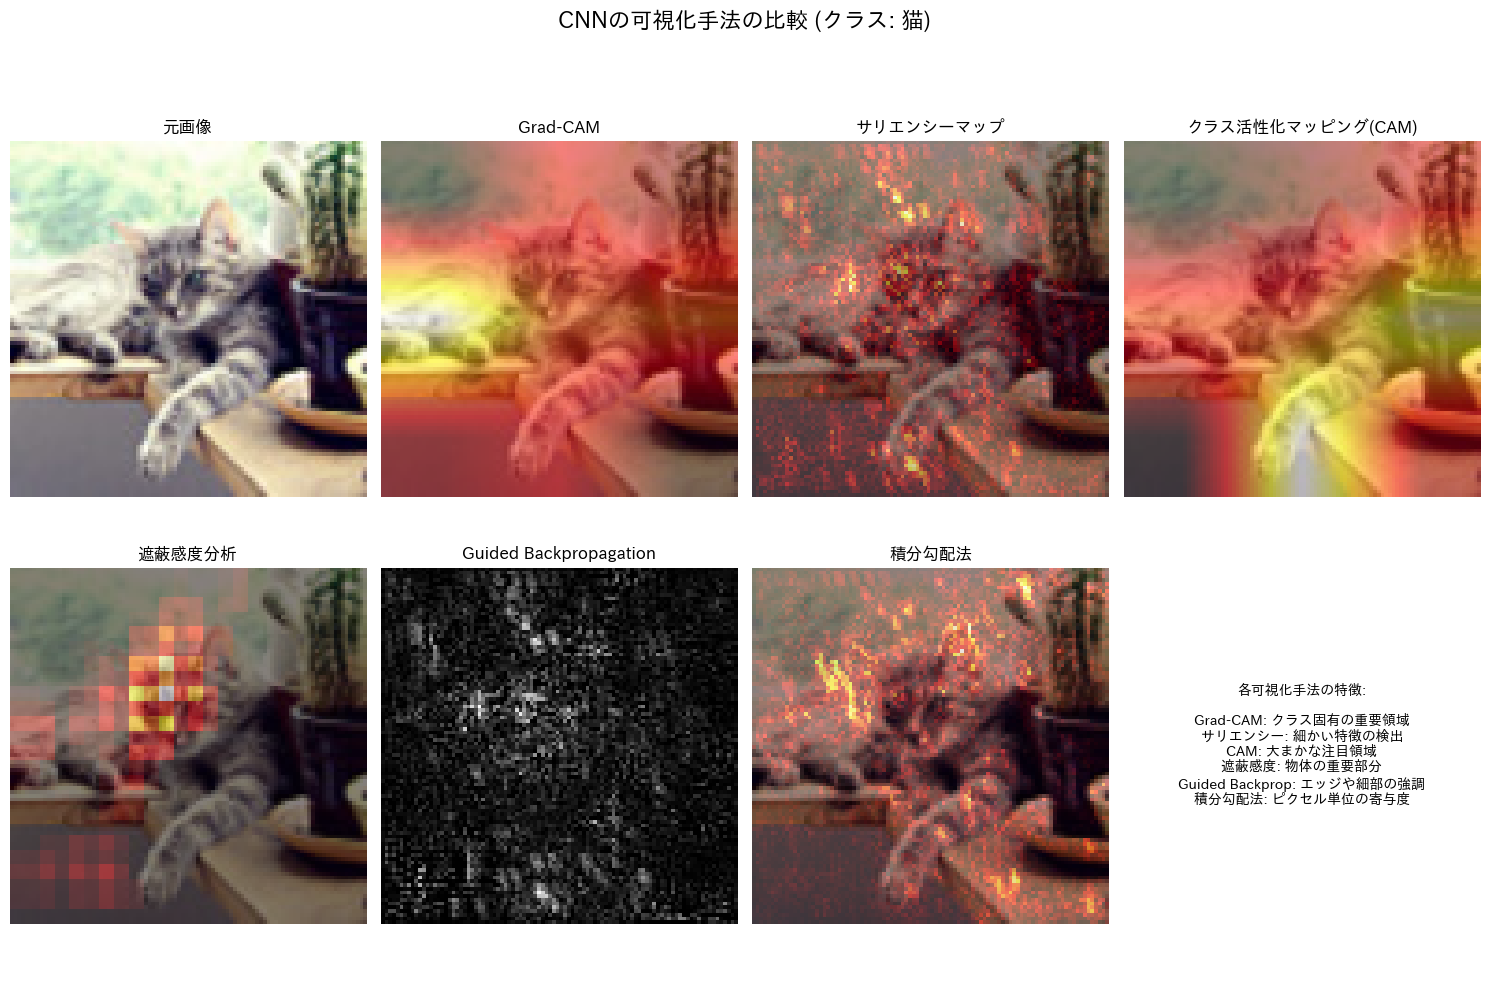

In [47]:
# 更新された関数をテスト
# 毎回実行するたびに異なる画像で可視化されます
compare_visualization_methods(model, test_dataset)